# Decision trees fitted to CO2 dataset

This is very simple example of decision trees fitted to a famous data set, in order to demonstrate how decision trees work.

We'll use the Mauna Loa CO2 data set, which gives CO2 measurements against time over about 40 years. The data set is available through the statsmodels package. We load it and take a look at the contents.

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load Mauna Loa CO2 dataset
data = sm.datasets.co2.load_pandas().data

# Clean missing values
data = data.dropna()

# Convert index to datetime
data.index = pd.to_datetime(data.index)

print(data.head())
print("Dimensions: " + str(data.shape))

              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4
Dimensions: (2225, 1)


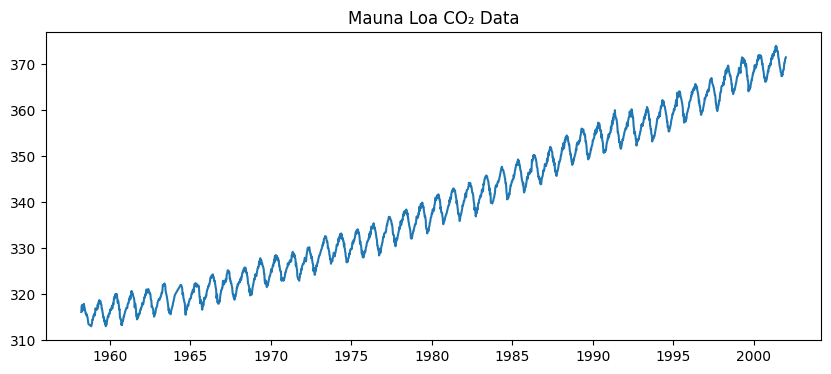

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare X as time (ordinal numbers)
X = np.arange(len(data)).reshape(-1, 1)
y = data['co2'].values

# Plot
plt.figure(figsize=(10, 4))
plt.plot(data.index, y, label='Observed CO₂')
plt.title('Mauna Loa CO₂ Data')
plt.show()

## Simple decision tree

Next we will fit our decision tree model. This is done by creating a model from the `DecisionTreeRegressor` class. To begin with, we fit a very simple model with depth 2.

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Fit decision tree
tree = DecisionTreeRegressor(max_depth=2, random_state=0)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=0)

Now we'll plot the model fit over the data.

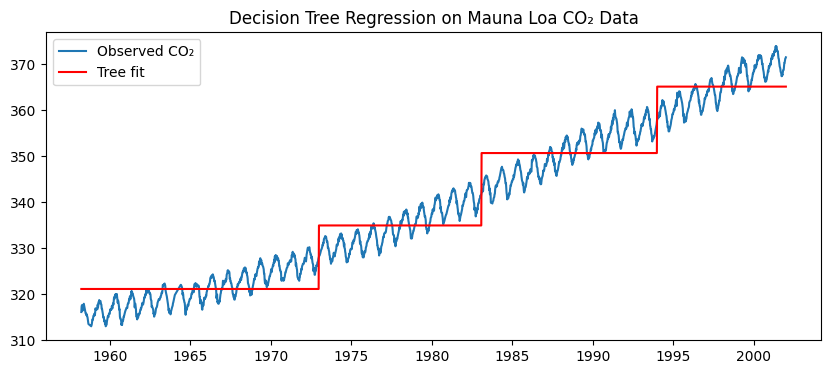

In [ ]:
# Plot
plt.figure(figsize=(10, 4))
plt.plot(data.index, y, label='Observed CO₂')
plt.plot(data.index, tree.predict(X), label='Tree fit', color='red')
plt.legend()
plt.title('Decision Tree Regression on Mauna Loa CO₂ Data')
plt.show()

This immediately illustrates how the decision tree partitions the input space (time, here) into regions, each of which is assigned a constant output (CO2) value. We can see this explicitly by plotting the tree structure as follows:

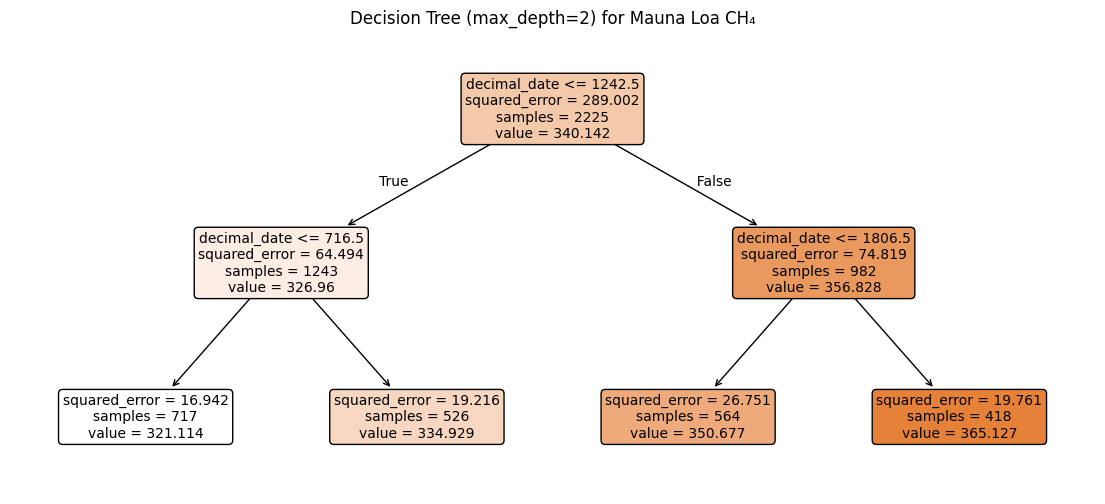

In [ ]:
# Plot tree structure
plt.figure(figsize=(14, 6))
plot_tree(tree,
          feature_names=["decimal_date"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree (max_depth=2) for Mauna Loa CH₄")
plt.show()

We may naturally want to play with the tree depth to see how the model changes. Let's overlay various tree depth fits.

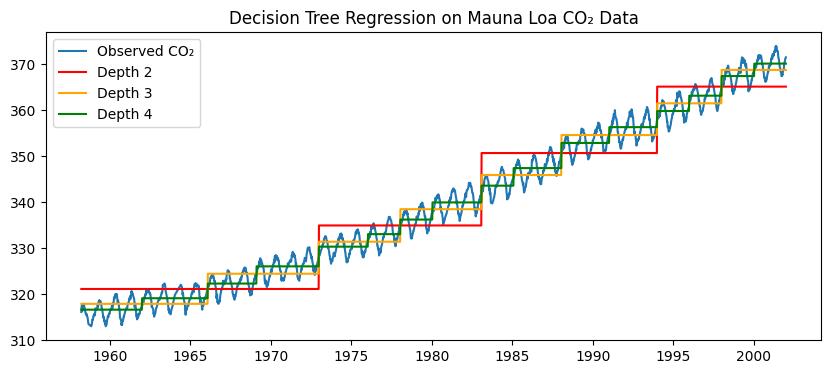

In [ ]:

# Plot
plt.figure(figsize=(10, 4))
plt.plot(data.index, y, label='Observed CO₂')

tree = DecisionTreeRegressor(max_depth=2, random_state=0)
tree.fit(X, y)
plt.plot(data.index, tree.predict(X), label='Depth 2', color='red')

tree = DecisionTreeRegressor(max_depth=3, random_state=0)
tree.fit(X, y)
plt.plot(data.index, tree.predict(X), label='Depth 3', color='orange')

tree = DecisionTreeRegressor(max_depth=4, random_state=0)
tree.fit(X, y)
plt.plot(data.index, tree.predict(X), label='Depth 4', color='green')




plt.legend()
plt.title('Decision Tree Regression on Mauna Loa CO₂ Data')
plt.show()

This notebook simply illustrates the strengths and weaknesses of decision trees. Strengths include their simplicity and interpretability. Limitations are that they cannot easily capture complex patterns, give a "blocky" approximation and can easily over or underfit the data.

## Random forest

Next we will try a random forest on the same data set.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=42)

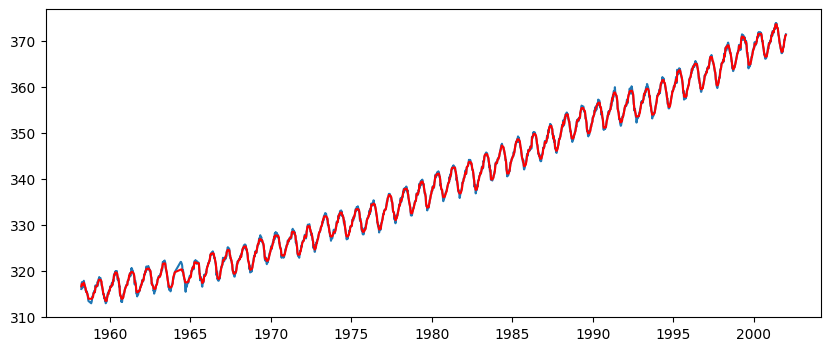

In [ ]:
# Plot
plt.figure(figsize=(10, 4))
plt.plot(data.index, y, label='Observed CO₂')

plt.plot(data.index, rf.predict(X), label='Random forest', color='red')

## Gradient boosted trees

Finally we will fit a gradient-boosted tree ensemble using the XGBoost package.

In [ ]:
from xgboost import XGBRegressor

# Fit XGBoost model
xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

Again, we will plot the results over the training data.

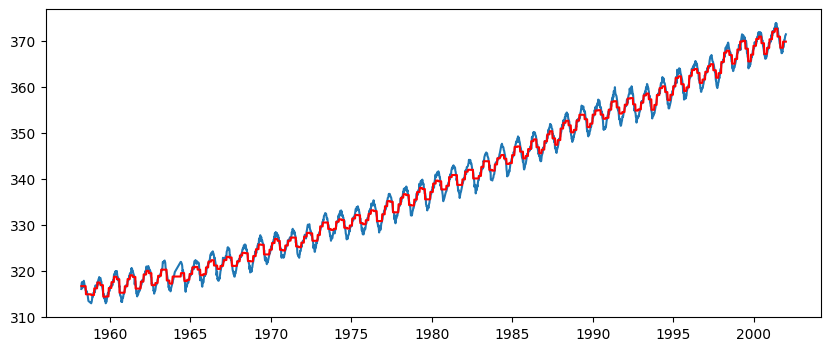

In [ ]:
# Plot
plt.figure(figsize=(10, 4))
plt.plot(data.index, y, label='Observed CO₂')

plt.plot(data.index, xgb.predict(X), label='XGB', color='red')

## Wrapping up

This notebook is a very quick demo on a univariate regression problem. We have not been very principled, and used all of our data for training our models. In practice, we would normally split the data into training, validation and test sets to better judge out of sample performance.